In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

Первое время = 0.005999565124511719 секунд
Второе время = 0.009009599685668945 секунд


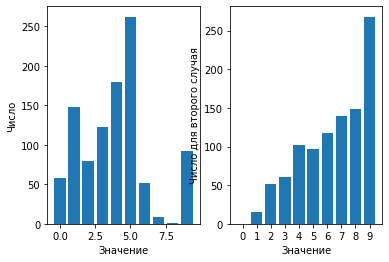

In [5]:
fig, ax = plt.subplots(1, 2)

weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weights/=weights.sum()
weights_new = np.sort(weights)
def RandGen(arr):
    number = np.random.rand()
    pos = 0
    for i in range(10):
        if (pos < number <= pos + arr[i]):
            return i
        else:
            pos+=arr[i]        

start = time.time()       
res = [RandGen(weights) for k in range(1000)]
end = time.time()
print("Первое время = %s секунд" % (end - start))

start = time.time()       
res_new = [RandGen(weights_new) for k in range(1000)]
end = time.time()
print("Второе время = %s секунд" % (end - start))

count = np.empty(10)
count_new = np.empty(10)

for i in range(10):
    count[i] = res.count(i)
    count_new[i] = res_new.count(i)

x = np.arange(10)

plt.xticks(x)
ax[0].bar( x , count)
ax[0].set(xlabel ='Значение', ylabel = ('Число'))

plt.xticks(x)
ax[1].bar( x , count_new)
ax[1].set(xlabel ='Значение', ylabel = ('Число для второго случая'))

plt.show()

Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

In [6]:
from math import log, exp

Параметр распределения: 1


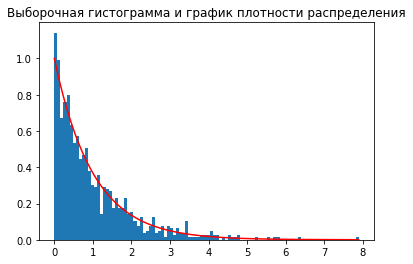

In [13]:
fig, ax = plt.subplots()

rand = [np.random.rand() for i in range(1000)]
rand.sort()

lambd = int(input("Параметр распределения: "))

distrib = [-1/lambd*log(1-rand[i]) for i in range(1000)]
plt.hist(distrib, bins = 100, density=True)

pl = [lambd*exp(-lambd*distrib[i]) for i in range(1000)]
plt.title("Выборочная гистограмма и график плотности распределения")
plt.plot(distrib, pl, color = 'red')

plt.show()

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

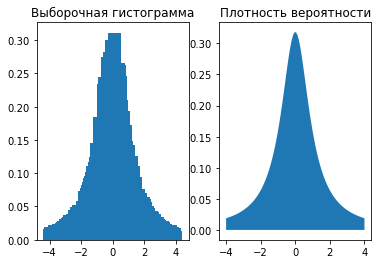

In [17]:
from math import pi
from scipy import stats

fig, ax = plt.subplots(1, 2)

rand = [8*np.random.rand()-4 for i in range(1000)]
rand_cauchy = []

i=0
while i != 1000:
    x = 1/pi*np.random.rand()
    if x < 1/(pi*(1+rand[i]*rand[i])):
        rand_cauchy.append(x)
        i+=1

ax[0].bar(rand, rand_cauchy)
ax[0].set(title = 'Выборочная гистограмма')

dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
ax[1].fill_between(x, 0, dist.pdf(x))
ax[1].set(title = 'Плотность вероятности')

plt.show()

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора

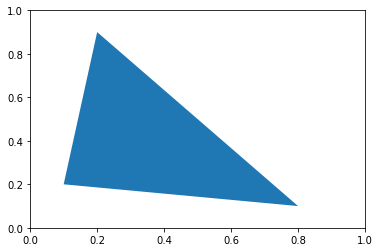

In [18]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

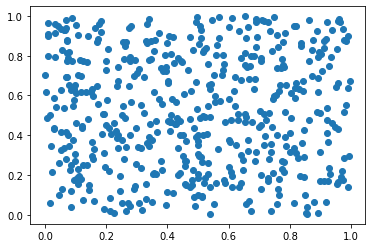

In [43]:
import math
xrand = np.array([np.random.rand() for i in range(500)])
yrand = np.array([np.random.rand() for i in range(500)])


plt.scatter(xrand, yrand)
plt.show()

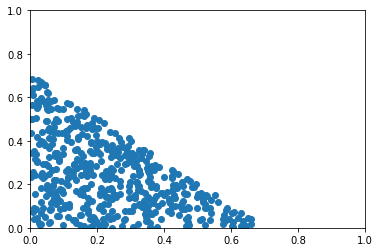

In [44]:
for i in range(500):
    if xrand[i] + yrand[i] - 1 > 0:
        xrand[i]= 1 - xrand[i] 
        yrand[i]=1 - yrand[i]

xrand*=math.hypot(0.7, 0.1)
yrand*=math.hypot(0.7, 0.1)

plt.scatter(xrand, yrand)
plt.xlim(left=0)
plt.xlim(right=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.show()

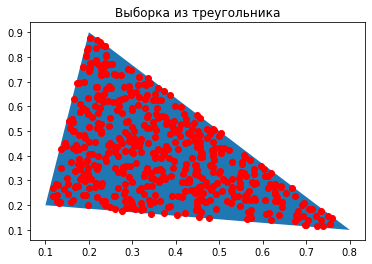

In [45]:
a = math.atan2(-1, 7)
x = xrand
y = yrand
xrand = x*math.cos(a)-y*math.sin(a)+0.1
yrand = x*math.sin(a)+y*math.cos(a)+0.2

plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(xrand, yrand, color = 'red')
plt.title("Выборка из треугольника")
plt.show()

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

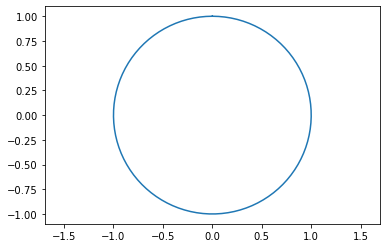

In [46]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

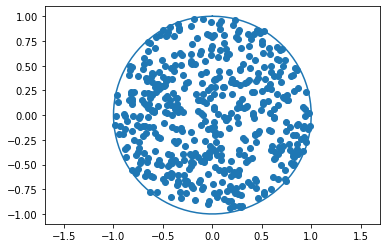

In [48]:
alpha = np.array([2*pi*np.random.rand() for i in range(500)])
r = np.array([np.random.rand() for i in range(500)])
for i in range(500):
    x[i] = math.sqrt(r[i])*math.cos(alpha[i])
    y[i] = math.sqrt(r[i])*math.sin(alpha[i])
plt.plot(np.sin(t), np.cos(t))
plt.scatter(x, y)
plt.axis('equal')
plt.show()

Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

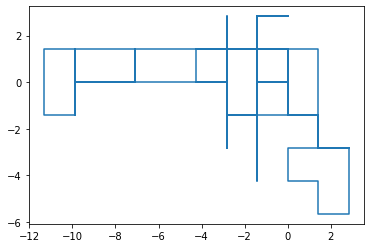

In [49]:
n = 100
def walk(n):
    x_index = np.random.choice(n, n//2, replace = False)
    y_index = np.random.choice(n, n//2, replace = False)

    x = np.array([sum([[1,-1][i in x_index] for i in range(n)][:j]) for j in range(n+1)])
    y = np.array([sum([[1,-1][i in y_index] for i in range(n)][:j]) for j in range(n+1)])

    alpha = math.sqrt(2)/2 # fi = cos(pi/4) = sin(pi/4)
    res_x = alpha*(x - y)
    res_y = alpha*(x + y)
    return res_x, res_y

x, y = walk(n)
plt.plot(x, y)
plt.show()

Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

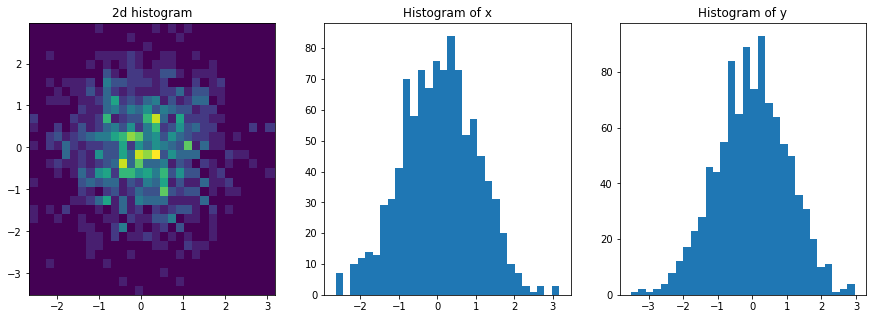

In [50]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

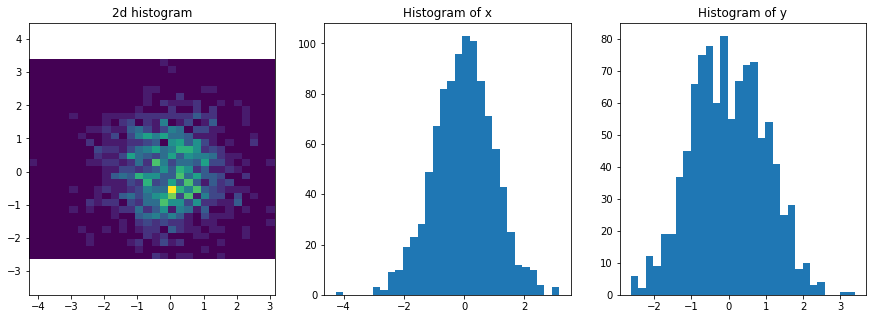

In [51]:
#Произведение плотностей есть плотность двумерного гауссовского вектора.

#Исключение вызовов тригонометрических функций np.sin и np.cos

n = 1000
i = 0
a1 = []
a2 = []
while i<n:
    u = 2*np.random.rand()-1
    v = 2*np.random.rand()-1
    e = u**2+v**2
    if 0<e<=1:
        a1.append(u)
        a2.append(v)
        i+=1

a1 = np.array(a1)
a2 = np.array(a2)
        
e = a1**2+a2**2
r = np.sqrt(-2 * np.log(e)/e)
x = a1 * r
y = a2 * r
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число  π . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число  π  с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

In [62]:
n=526000
p = 0

x = np.array([np.random.rand() for i in range(n)])
y = np.array([np.random.rand() for i in range(n)])

for i in range(n):    
    if (x[i]**2 +y[i]**2 < 1):
        p+=1   
err = abs(p/n*4 - math.pi) / math.pi * 100

        
print('Приближение Pi =', format( round(p/n*4, 3) )) 
print('Ошибка {} %'.format( abs(p/n*4 - math.pi) / math.pi * 100))

Приближение Pi = 3.141
Ошибка 0.030120574544006844 %


Пусть X - случайная величина, принимающая значения 1 с веротяностью Pi/4 и 0 с вероятностью 1-Pi/4 (попадает ли точка из квдарата первой четверти в четверть круга). Её мат. ожидание Pi/4, а дисперсия Pi/4*(1-Pi/4). Так как отношение попаданий в круг к отношению бросков должно стремиться к Pi/4, то воспользуемся ЦПТ, 0.99 = P(Pi-0.0001 < (X1+...Xn)/n < Pi-0.0001), делаем преобразования, чтобы из числителя вычесть мат. ожидание помноженное на n, а в числителе корень из n умноженный на дисперсию, и эта вероятность стремится к Ф(Pi+0.0001)-Ф(Pi-0.0001), где Ф - функция Лапласа.
Отсюда примерно n = 526000